# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 71
2. Student Names - Mansi Sharma (ms89743), Milind Bhatia (mb67324)

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. **(2 points)** Write down the class-conditional data distributions for each of the classes defined above.

b. **(4 points)**. Derive the Bayes optimal decision boundaries for this problem.

c. **(4 points)** What is the Bayes Error rate for this classifier?

In [ ]:
from IPython import display

display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW4/Images/Q1_1.jpeg")


In [ ]:
display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW4/Images/Q1_2.jpeg")


## Q2. (10 points) Multi-class Logistic Regression Derivation

To use Logistic Regression for multi-class setting with K classes - $\{1,2, ... K\}$, we need to learn $K-1$ $d$-dimensional weight vectors, $\{w_1, w_2, ..., w_{K-1}\}$ which then provide the posterior probabilities for each class in the following way -

\begin{align}
  \mathbb{P} (y = k|x) =
  \begin{cases}
                                   \dfrac{exp(w_k^Tx)}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for }k \in [1,K-1] \\
                                   \dfrac{1}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for } k = K
  \end{cases}
\end{align}

Suppose you are given a dataset $(X,Y)$ consisting of $N$ data-points where each $x$ is in $d$-dimensions, and $y \in [1, 2, ... K]$.

a. **(3 points)** Write down the total conditional likelihood of observing the corresponding y's for the given x's in the dataset, under the model specified above.

b. **(7 points)** Derive the update equation for any $w_i$ that can be used to learn $w_i$ via gradient descent.

### --> Q2 DROPPED

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd


a. **(5 points)** Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [30]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', transform=transform, download=True)
### END CODE ###

100%|██████████| 182040794/182040794 [00:12<00:00, 14598703.85it/s]


100%|██████████| 64275384/64275384 [00:08<00:00, 7769675.09it/s] 


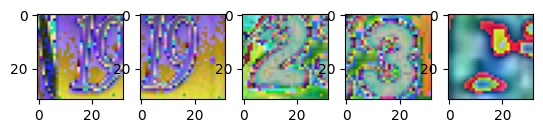

In [31]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. **(5 points)** Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [34]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = random_split(train_dataset, [train_num, val_num])
### END CODE ###


# Create data loaders
### START CODE ###
size = 256
train_loader = DataLoader(train_dataset, batch_size=size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=size, shuffle=True)
### END CODE ###

c. **(5 points)** Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [35]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.fc1 = nn.Linear(32 * 32 * 3, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 10)
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        ### END CODE ###
        return x


In [36]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###

d. **(5 points)** Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [37]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = nn.functional.cross_entropy(out, target)
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [38]:
epochs = 15
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

100%|██████████| 58/58 [00:01<00:00, 57.06it/s]


Epoch: 1 Train Loss: 1.472167888437051 Val Loss: 1.0493728451770477 Val Acc: 0.6842751842751843


100%|██████████| 58/58 [00:01<00:00, 57.22it/s]


Epoch: 2 Train Loss: 0.9617865708844368 Val Loss: 0.89399182318079 Val Acc: 0.7307534807534808


100%|██████████| 58/58 [00:01<00:00, 57.11it/s]


Epoch: 3 Train Loss: 0.847988282059781 Val Loss: 0.8391668844704676 Val Acc: 0.7461097461097461


100%|██████████| 58/58 [00:01<00:00, 57.21it/s]


Epoch: 4 Train Loss: 0.7712732903003977 Val Loss: 0.7693306109698913 Val Acc: 0.7718400218400219


100%|██████████| 58/58 [00:01<00:00, 57.07it/s]


Epoch: 5 Train Loss: 0.720753605242079 Val Loss: 0.7402284790706087 Val Acc: 0.7832377832377833


100%|██████████| 58/58 [00:01<00:00, 57.25it/s]


Epoch: 6 Train Loss: 0.6844308967181881 Val Loss: 0.7244869081693499 Val Acc: 0.7870597870597871


100%|██████████| 58/58 [00:01<00:00, 57.02it/s]


Epoch: 7 Train Loss: 0.6607998055348308 Val Loss: 0.7071830024655452 Val Acc: 0.7931340431340431


100%|██████████| 58/58 [00:01<00:00, 55.10it/s]


Epoch: 8 Train Loss: 0.6318095110390498 Val Loss: 0.7023533744431896 Val Acc: 0.7951815451815452


100%|██████████| 58/58 [00:01<00:00, 56.76it/s]


Epoch: 9 Train Loss: 0.614092636420635 Val Loss: 0.6665753221010661 Val Acc: 0.8032350532350533


100%|██████████| 58/58 [00:01<00:00, 56.45it/s]


Epoch: 10 Train Loss: 0.5966916335024695 Val Loss: 0.6779812028051366 Val Acc: 0.8005050505050505


100%|██████████| 58/58 [00:01<00:00, 52.83it/s]


Epoch: 11 Train Loss: 0.5784702168706232 Val Loss: 0.6553492927987361 Val Acc: 0.8104013104013104


100%|██████████| 58/58 [00:01<00:00, 56.59it/s]


Epoch: 12 Train Loss: 0.5657379000781492 Val Loss: 0.6512913079721303 Val Acc: 0.8091045591045591


100%|██████████| 58/58 [00:01<00:00, 56.96it/s]


Epoch: 13 Train Loss: 0.5556493563086962 Val Loss: 0.6665310533913048 Val Acc: 0.8056238056238056


100%|██████████| 58/58 [00:01<00:00, 56.85it/s]


Epoch: 14 Train Loss: 0.5409149364230678 Val Loss: 0.6456392559724007 Val Acc: 0.8151788151788152


100%|██████████| 58/58 [00:01<00:00, 56.62it/s]

Epoch: 15 Train Loss: 0.5313366264158239 Val Loss: 0.6593790068315282 Val Acc: 0.810947310947311


e. **(5 points)** Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|██████████| 102/102 [00:01<00:00, 52.93it/s]


Test accuracy: 0.7799631223110018


<Axes: >

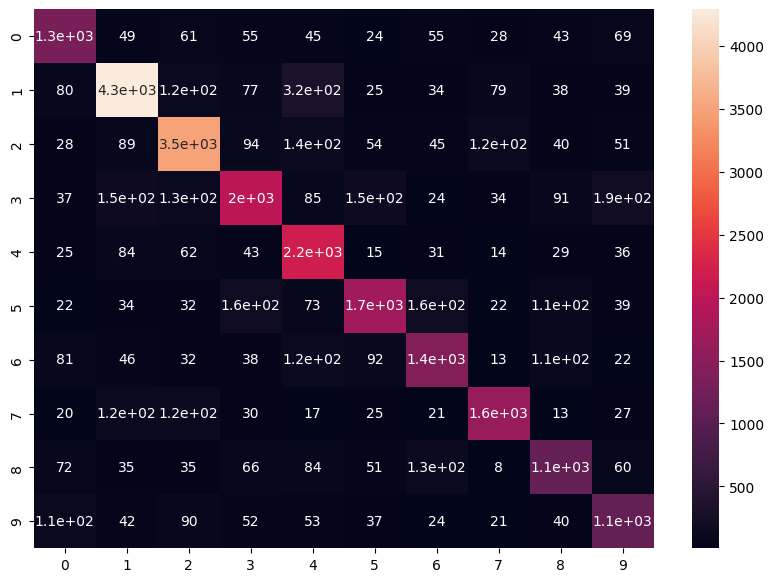

In [39]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        pred = out.argmax(dim=1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.extend(target.cpu().numpy())
        all_y_pred.extend(pred.cpu().numpy())
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = confusion_matrix(all_y_true, all_y_pred)
### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

a) **(3 points)** Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

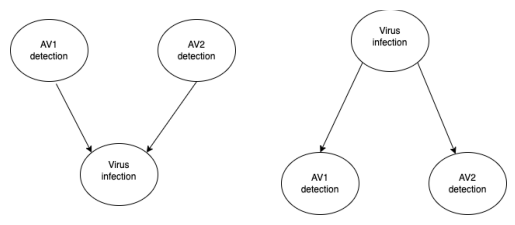

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
img_A = mpimg.imread('hwq.drawio (3).png')
img_B = mpimg.imread('hwq.drawio (4).png')

fig, ax = plt.subplots(1,2)
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

**Image A** captures the independence assumtions correctly because as per BBN, the children are independent of each other given the parent. Since we have two different anti-virus they should be independent of each other and should give out results only given the virus infection.

P(AV1) and P(AV2) are independent events

 
</font>
</div>



b) **(7 points)** From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

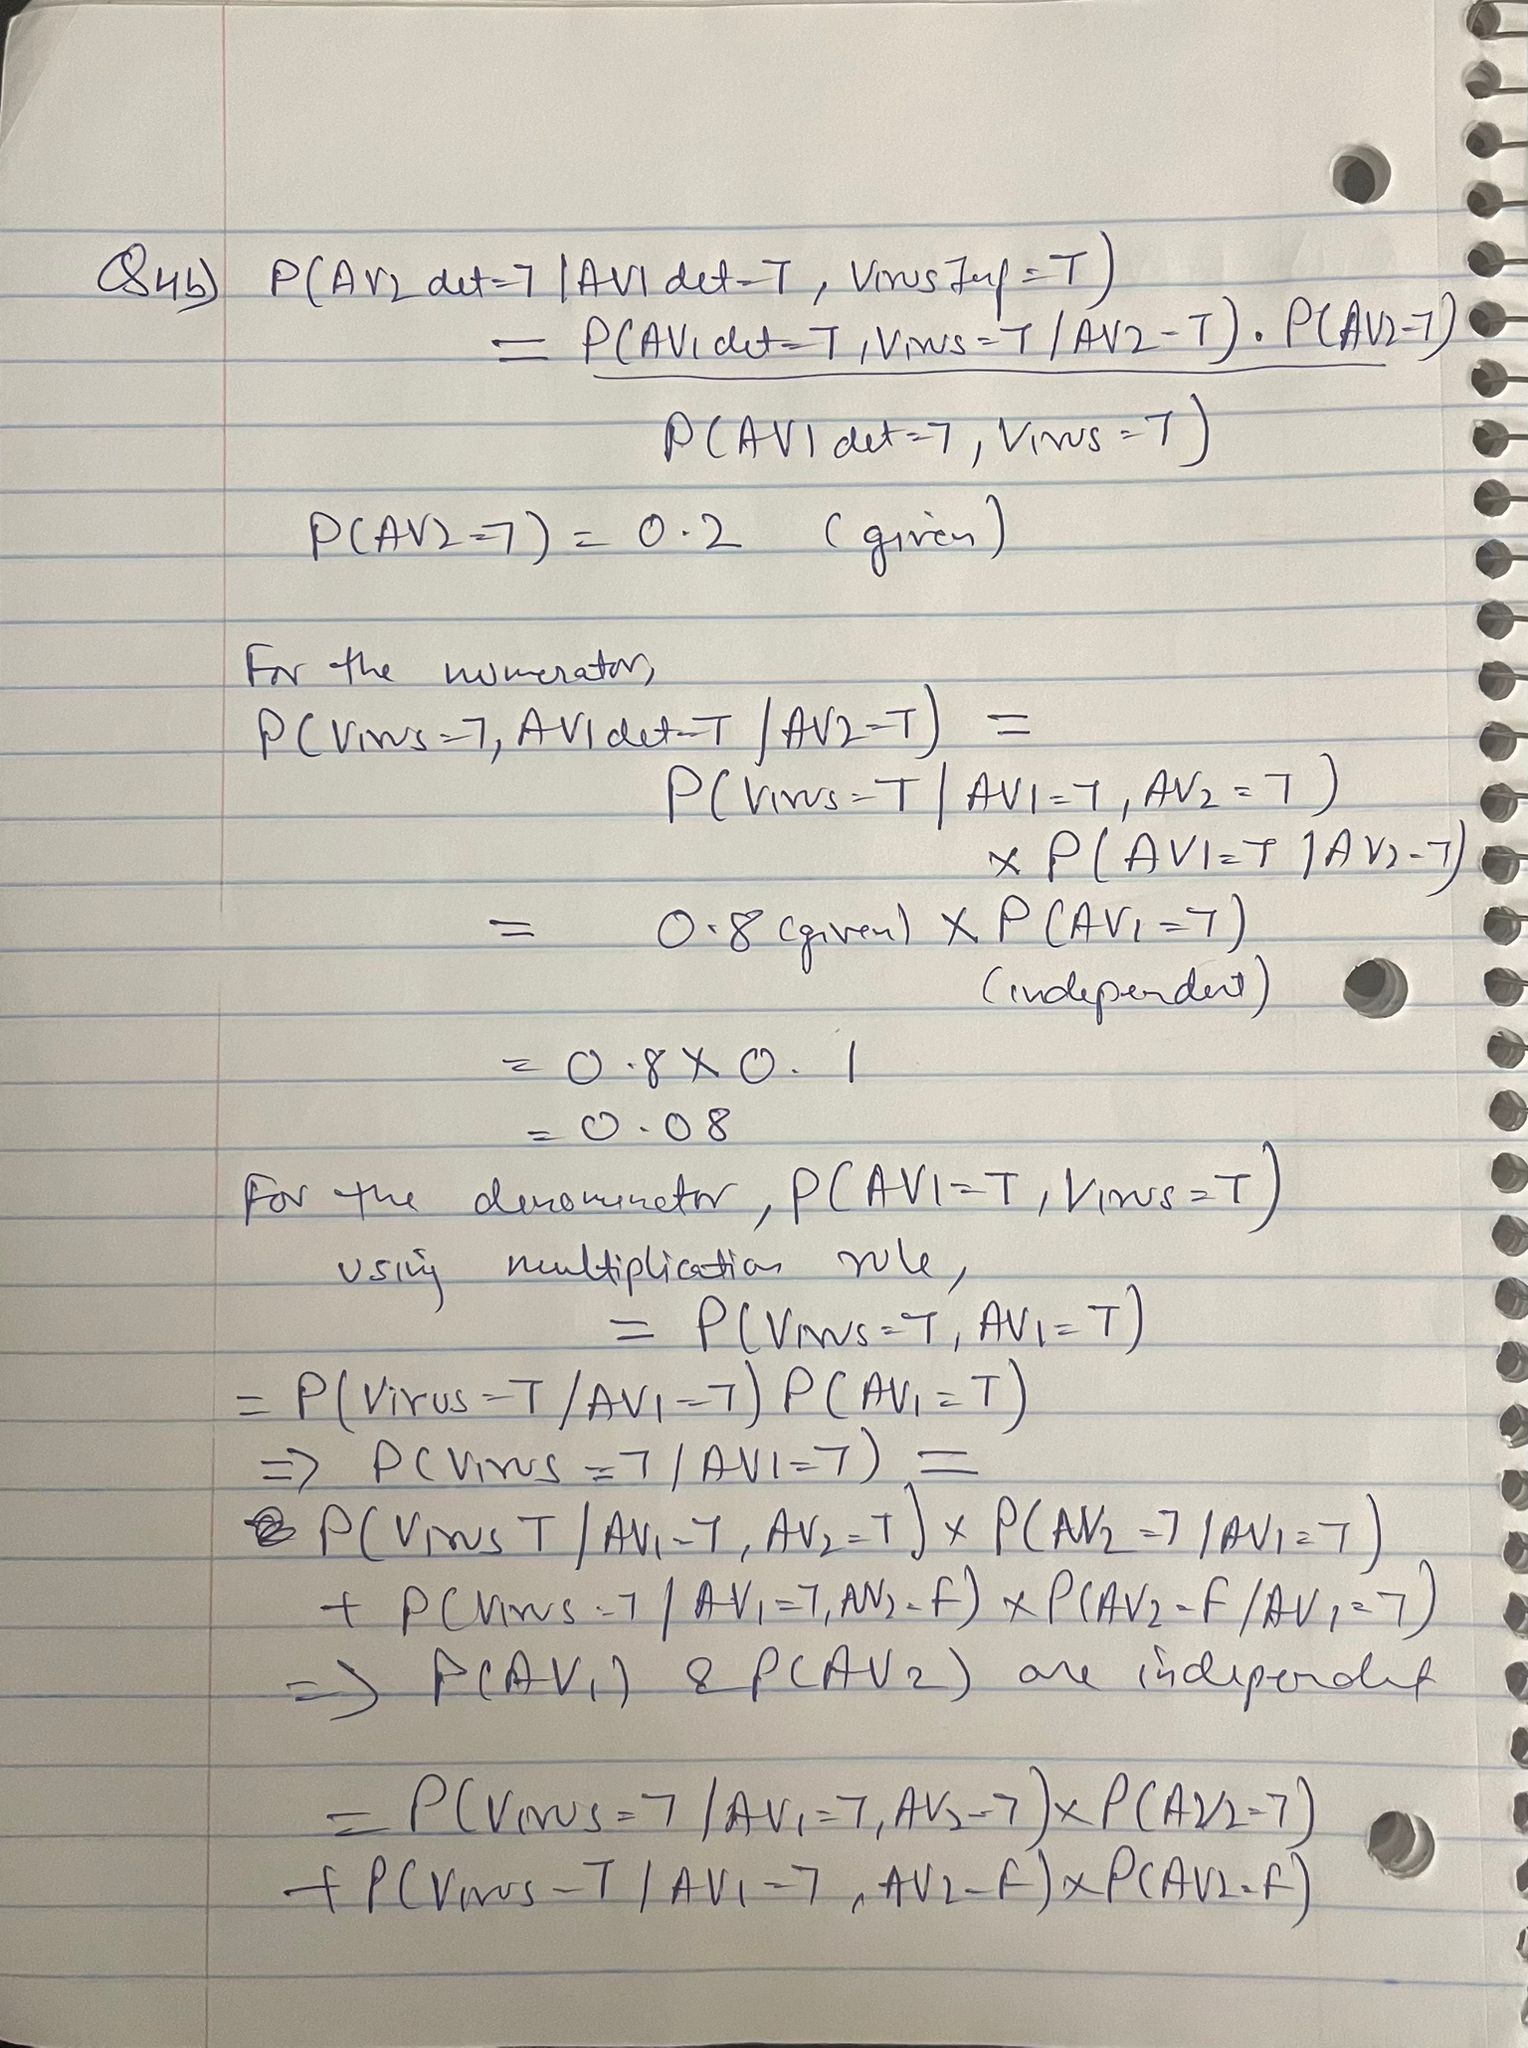

In [41]:
from IPython import display

display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW4/Images/Q4b_1.jpeg")

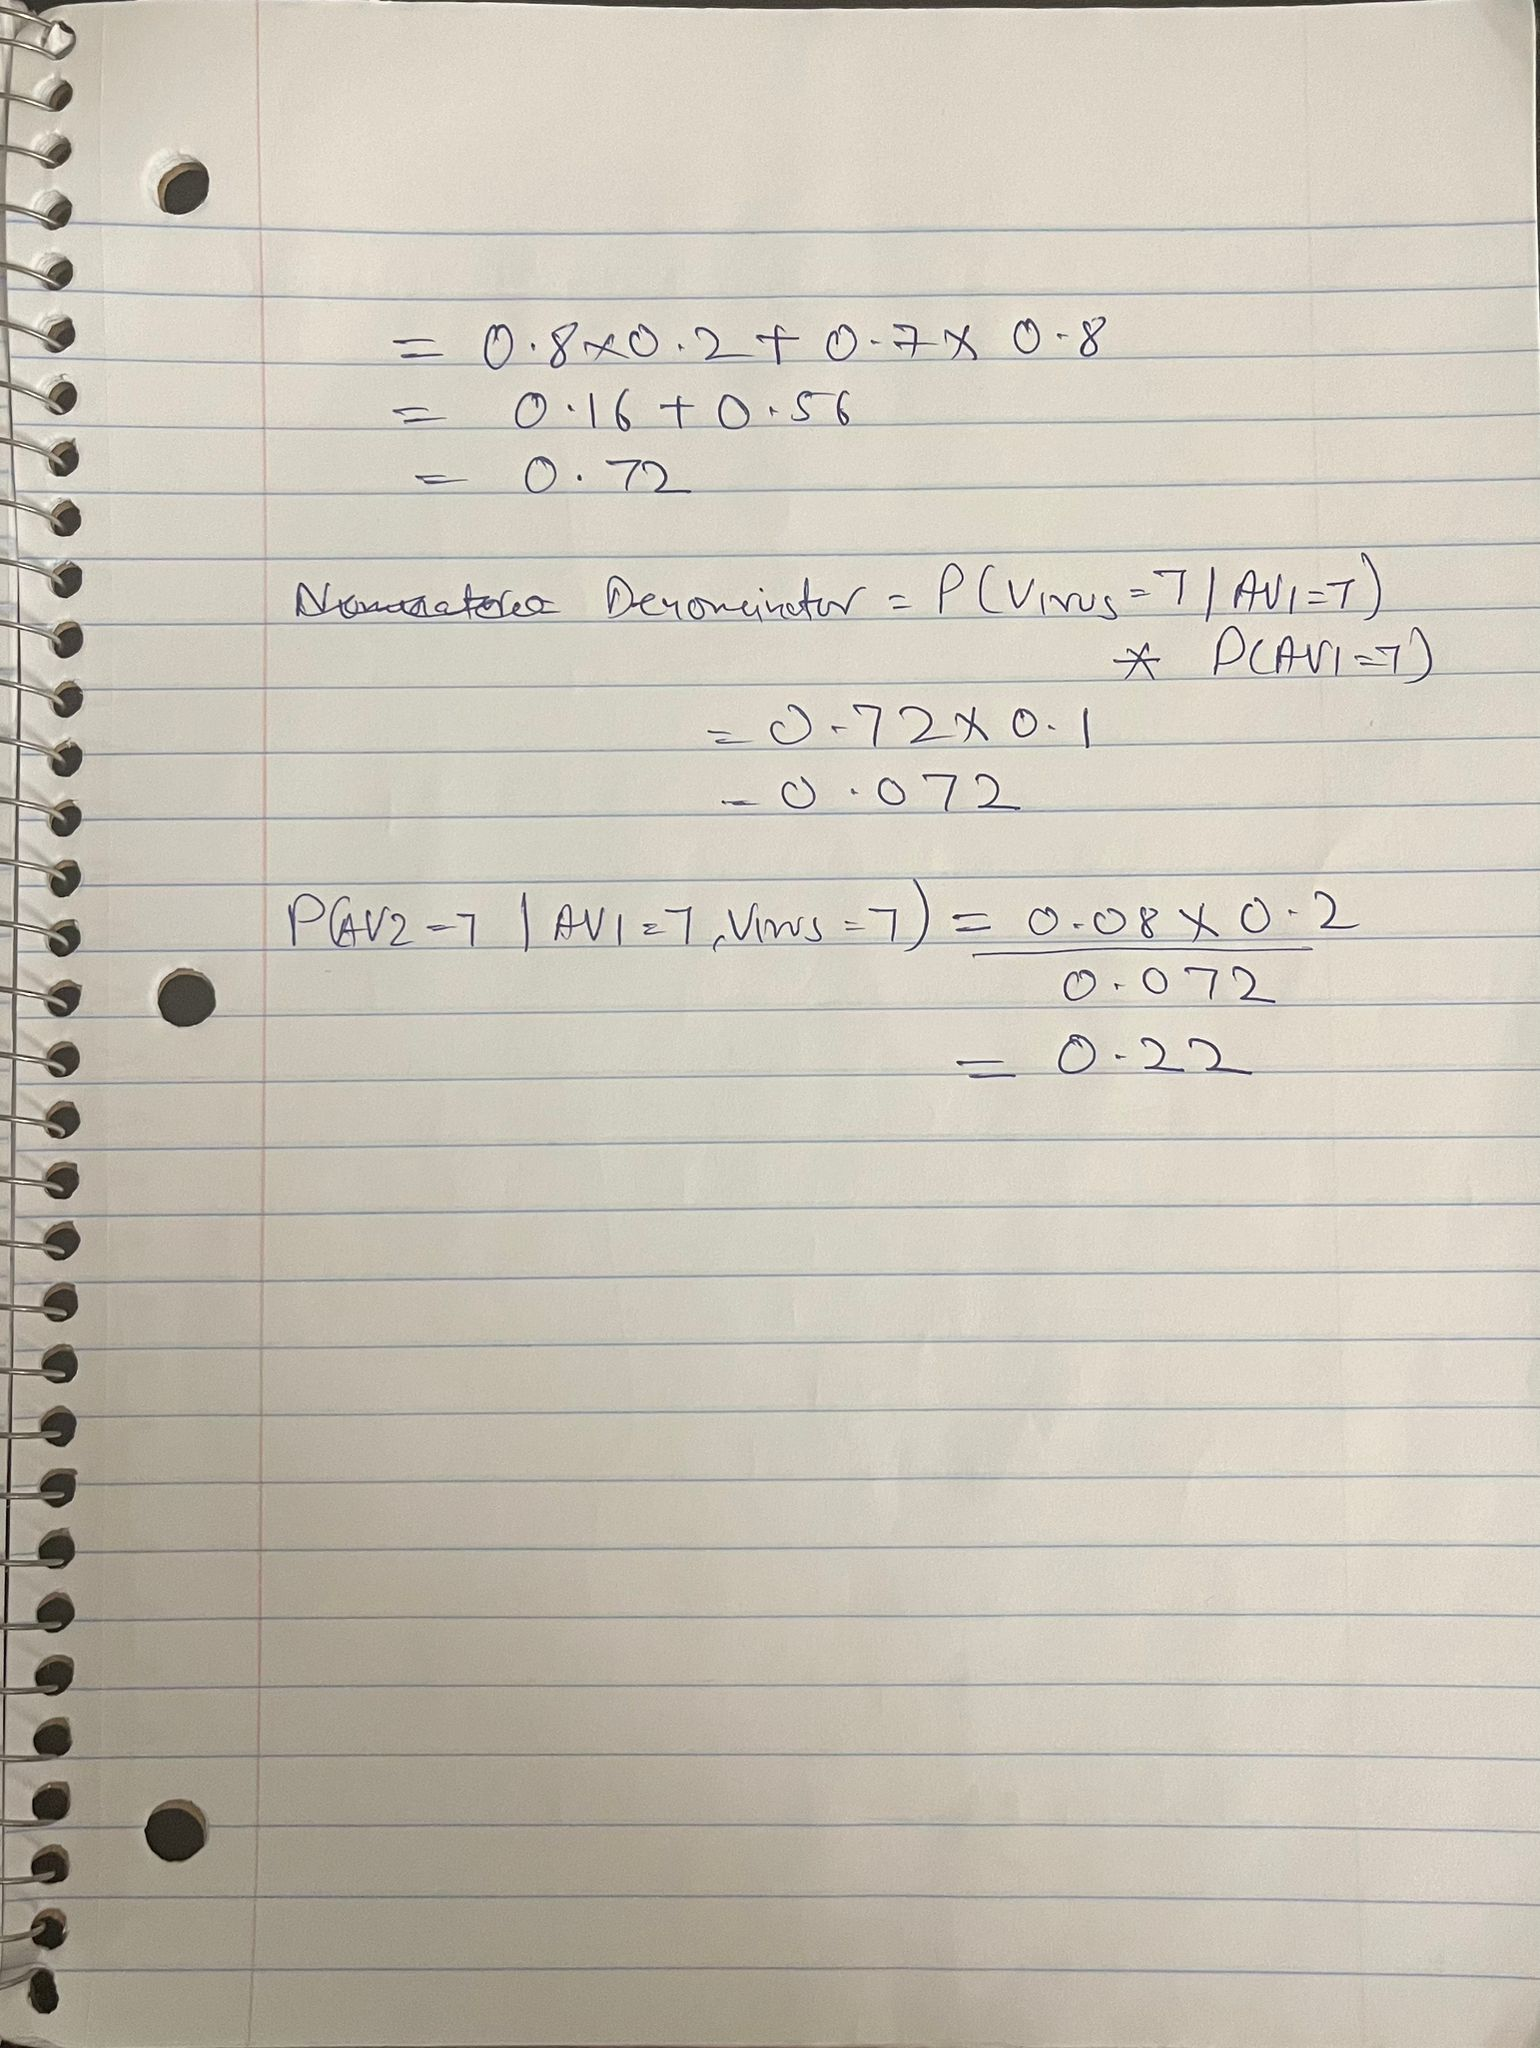

In [42]:
display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW4/Images/Q4b_2.jpeg")

## Q5. (25 points) Classification using Sklearn and Model Evaluation

The objective of this question is to introduce you to Scikit-Learn and its various tools for creating and assessing classification models. You will work with the Customer_Churn_Telecom dataset. First, you'll need to perform some data preprocessing tasks on this dataset. After that, your task is to utilize Scikit-Learn to construct a range of classifiers using this dataset, followed by evaluating the performance of these models. To gain a better understanding of the specific steps involved, please proceed to read the subsequent sections of the question for further instructions.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving customer_churn_telcom.csv to customer_churn_telcom.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [2]:
#lets print the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [4]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [5]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##

for col in yes_no_columns:
    df[col] = df[col].replace({'Yes':1,'No':0})
df['gender'] = df['gender'].replace({'Female':1,'Male':0})

(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [6]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##

df2 = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [7]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['Churn'])
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##

X_train_f, X_test, y_train_f, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

## END CODE ##

In [9]:
# Write code to make train and validation splits

## START CODE ##

X_train, X_val, y_train, y_val = train_test_split(X_train_f, y_train_f, test_size=0.2, random_state=15,stratify=y_train_f)

## END CODE ##

In [10]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

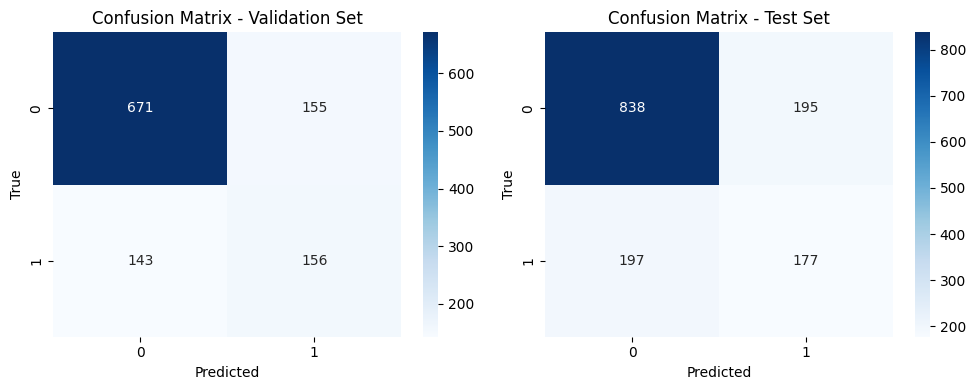

In [19]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## CODE HERE ##
import seaborn as sns
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=15)
dt.fit(X_train,y_train)
y_pred_val = dt.predict(X_val)
y_pred_test = dt.predict(X_test)

y_scores_dt_val = dt.predict_proba(X_val)[:, 1]
y_scores_dt_test = dt.predict_proba(X_test)[:, 1]

conf_ma_val = confusion_matrix(y_val, y_pred_val)
conf_ma_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_ma_val, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot the confusion matrix for the test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_ma_test, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()



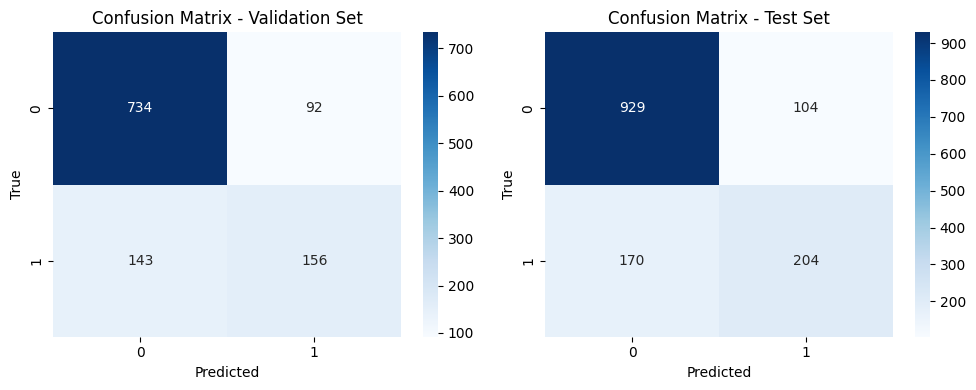

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##
import seaborn as sns
lr = LogisticRegression(random_state=15)
lr.fit(X_train,y_train)
y_pred_val = lr.predict(X_val)
y_pred_test = lr.predict(X_test)

y_scores_lr_val = lr.predict_proba(X_val)[:, 1]
y_scores_lr_test = lr.predict_proba(X_test)[:, 1]

conf_ma_val = confusion_matrix(y_val, y_pred_val)
conf_ma_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_ma_val, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot the confusion matrix for the test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_ma_test, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


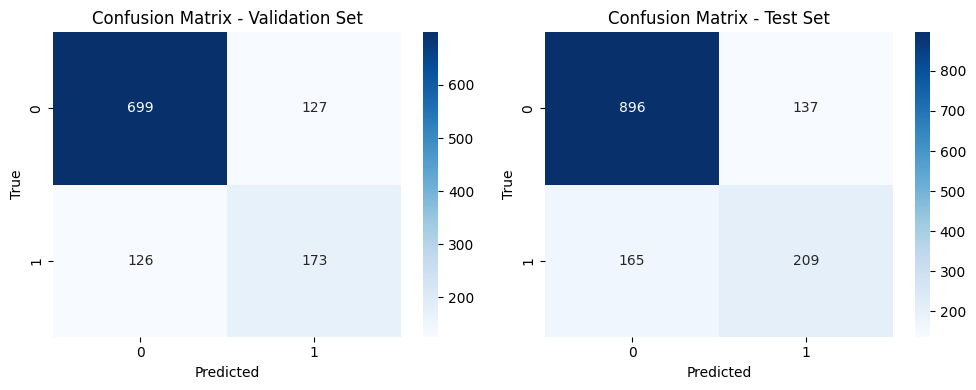

In [21]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##
import seaborn as sns
mlp = MLPClassifier(random_state=15)
mlp.fit(X_train,y_train)
y_pred_val = mlp.predict(X_val)
y_pred_test = mlp.predict(X_test)

y_scores_mlp_val = mlp.predict_proba(X_val)[:, 1]
y_scores_mlp_test = mlp.predict_proba(X_test)[:, 1]

conf_ma_val = confusion_matrix(y_val, y_pred_val)
conf_ma_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_ma_val, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot the confusion matrix for the test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_ma_test, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation - Logistic Regression AUC: 0.83
Validation - Decision Tree AUC: 0.67
Validation - MLP AUC: 0.82
Test - Logistic Regression AUC: 0.84
Test - Decision Tree AUC: 0.64
Test - MLP AUC: 0.81


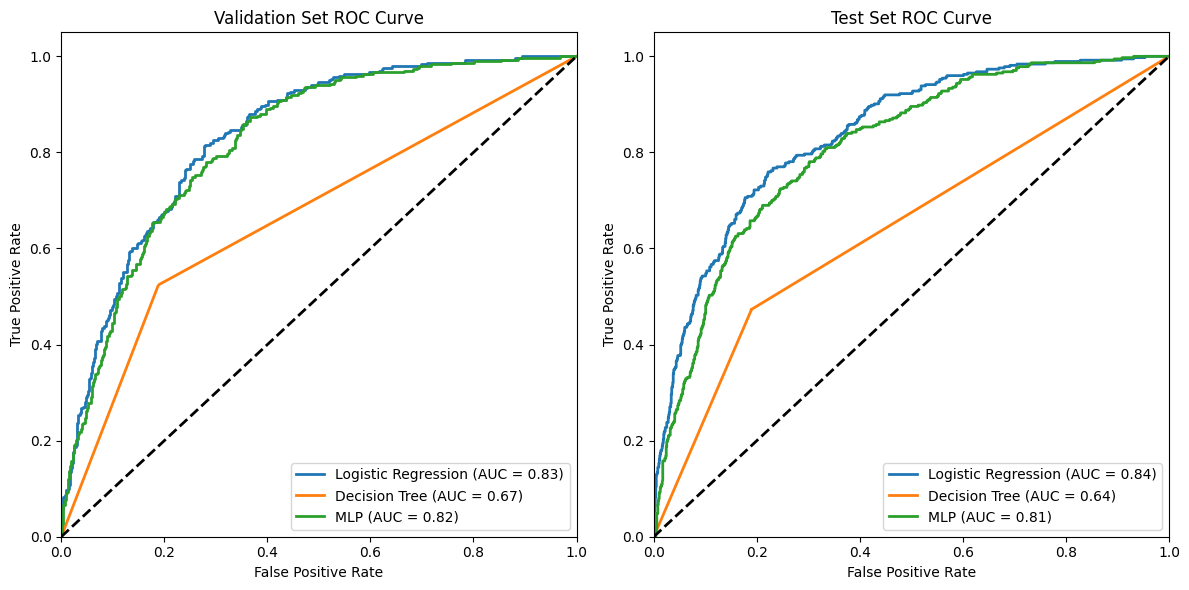

In [24]:
# Plot ROC curves

from sklearn.metrics import roc_curve, roc_auc_score

## CODE HERE ##
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Create a list of classifiers and corresponding labels
classifiers = [lr, dt, mlp]
classifier_labels = ['Logistic Regression', 'Decision Tree', 'MLP']

auc_scores_val = {}
auc_scores_test = {}

# Plot ROC curves for validation and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)

    # Validation Set
    y_score_val = clf.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, _ = roc_curve(y_val, y_score_val)
    auc_score_val = roc_auc_score(y_val, y_score_val)
    auc_scores_val[classifier_labels[i]] = auc_score_val
    axes[0].plot(fpr_val, tpr_val, lw=2, label=f'{classifier_labels[i]} (AUC = {auc_score_val:.2f})')

    # Test Set
    y_score_test = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    auc_score_test = roc_auc_score(y_test, y_score_test)
    auc_scores_test[classifier_labels[i]] = auc_score_test
    axes[1].plot(fpr_test, tpr_test, lw=2, label=f'{classifier_labels[i]} (AUC = {auc_score_test:.2f})')

# Set plot labels and legend for the validation set
axes[0].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Validation Set ROC Curve')
axes[0].legend(loc='lower right')

# Set plot labels and legend for the test set
axes[1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Test Set ROC Curve')
axes[1].legend(loc='lower right')

# Display AUC scores
for label, auc_score in auc_scores_val.items():
    print(f'Validation - {label} AUC: {auc_score:.2f}')
for label, auc_score in auc_scores_test.items():
    print(f'Test - {label} AUC: {auc_score:.2f}')

plt.tight_layout()
plt.show()

(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


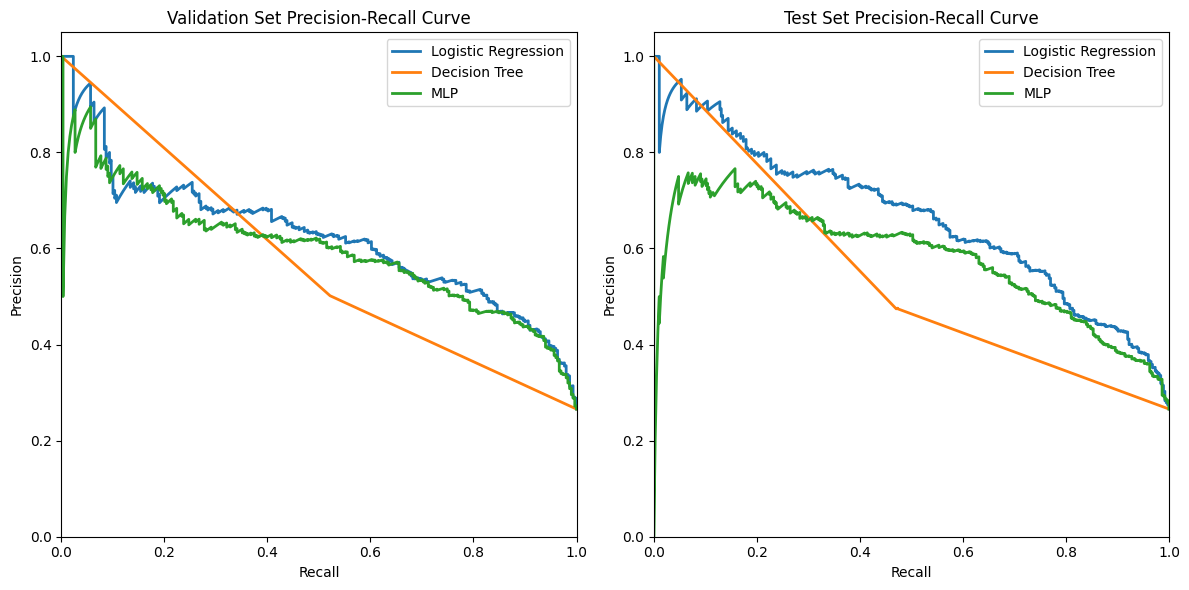

In [28]:
# Plot Precision-Recall curves

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

## CODE HERE ##
classifiers = [lr, dt, mlp]
classifier_labels = ['Logistic Regression', 'Decision Tree', 'MLP']

pr_auc_scores_val = {}
pr_auc_scores_test = {}

# Plot precision-recall curves for validation and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)

    # Validation Set
    y_score_val = clf.predict_proba(X_val)[:, 1]
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_score_val)
    axes[0].plot(recall_val, precision_val, lw=2, label=f'{classifier_labels[i]}')

    # Test Set
    y_score_test = clf.predict_proba(X_test)[:, 1]
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_score_test)
    axes[1].plot(recall_test, precision_test, lw=2, label=f'{classifier_labels[i]}')

# Set plot labels and legend for the validation set
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Validation Set Precision-Recall Curve')
axes[0].legend(loc='upper right')

# Set plot labels and legend for the test set
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Test Set Precision-Recall Curve')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()